In [21]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


### Read Data

In [22]:
df1 = pd.read_excel('DDS9_Data_Extract_with_labels.xlsx')
df2 = pd.read_excel('DDS10_Data_Extract_with_labels.xlsx')
df3 = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx')

### Concatenated dataset for the common columns

In [23]:
df1cols = set(df1.columns)
df2cols = set(df2.columns)
df3cols = set(df3.columns)
common_cols = list(df1cols.intersection(df2cols).intersection(df3cols))
#print(len(common_cols))
merged_df = pd.concat([df1[common_cols], df2[common_cols], df3[common_cols]], ignore_index=True)
#merged_df

In [24]:
#print(df1.columns)

### Model 1: Relationship between household income and media/home entertainment equipment owned by a household

Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above	Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know

In [99]:
# Renaming column names for modeling
df1 = df1.rename(columns={
    "Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.": "household_income",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)": "DVR_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television": "FlatTV_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box": "MediaBox_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob": "Fob_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player": "DVD_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console": "GamingCon_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player": "PortableGame_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage": "Router_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer": "Desktop_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer": "Laptop_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop/tablet hybrid": "LapTabHybrid_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet (nine inches and above)": "Tab9in_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Small tablet (between seven and nine inches)": "Tab7_9in_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader": "EbookReader_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone (three to five inches)": "Smartphone3_5in_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Large smartphone (between five and seven inches)": "LargeSmartphone_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)": "BasicMobile_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch": "Smartwatch_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band": "FitnessBand_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Smart glasses": "SmartGlasses_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-3D printer": "3DPrinter_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above": "None_owned",
    "Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know": "DontKnow_owned",
    "Q36r1 - Pay TV (cable and/or satellite) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the o" : "PayTV",
    "Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the order you wish to r": "HomeInternet",
    "Q36r3 - Landline telephone - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the order you wish": "LandlineTelephone",
    "Q36r4 - Mobile voice - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the order you wish to ra": "MobileVoice",
    "Q36r5 - Mobile data plan - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the order you wish t": "MobileDataPlan",
    "Q36r6 - Streaming video service  - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selec": "StreamingVideoService",
    "Q36r7 - Streaming music service  - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking e": "StreamingMusicService",
    "Q36r8 - Gaming - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicki": "Gaming",
    "Q36r9 - News/Newspaper (print or digital) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the": "News/Newspaper",
    "Q36r10 - Magazine (print or digital) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with \"1\" being the most valued. Make your selections by clicking each item in the orde": "Magazine",
    "Q1r1 - To begin, what is your age?": "Age",
    "Q2 - In which state do you currently reside?": "State",
    "QNEW3 - What is your employment status?": "EmploymentStatus",
    "Q4 - What is your gender?": "Gender",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television":"FlatTV_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)":"DVR_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box":"StreamingMediaBox_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob":"PortableDevice_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)":"DigitalTVAntenna_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player":"Blu-ray_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console": "GamingConsole_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player": "PortableGamePlayer_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage": "Router_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer": "DesktopComputer_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer": "LaptopComputer_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet": "Tablet_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader": "EbookReader_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone": "Smartphone_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone": "BasicMobile_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch": "Smartwatch_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band": "FitnessBand_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset": "VRHeadset_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone": "Drone_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above": "None_Future",
    "Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know": "DontKnow_Future"

    
    
})

# Print the updated column names
print(df1.columns)


Index(['record - Record number', 'Age', 'Gender', 'age - you are...', 'State',
       'region - Region', 'EmploymentStatus',
       'Q5 - Which category best describes your ethnicity?',
       'QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?',
       'QNEW2 - How old are the children in your home?-0-4 years',
       ...
       'Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?',
       'Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?',
       'Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?',
       'Q73r13 - Play video games - Which are things you typically do while watching your home television system?',
       'Q39r1 - I would rather pay for online content (news, information, sports, games, social interaction sites, movies, mus

In [26]:
# Setting up data for the model 
income_equipment_data = df1[['household_income', 'DVR_owned', 'FlatTV_owned', 'MediaBox_owned','Fob_owned','DVD_owned','GamingCon_owned','PortableGame_owned','Router_owned',
'Desktop_owned','Laptop_owned','LapTabHybrid_owned','Tab9in_owned','Tab7_9in_owned','EbookReader_owned','Smartphone3_5in_owned','LargeSmartphone_owned', 'BasicMobile_owned', 'Smartwatch_owned','FitnessBand_owned','SmartGlasses_owned','3DPrinter_owned','None_owned','DontKnow_owned']]

# Checking for missing values
#income_equipment_data.isnull().any()

# Converting income ranges to numerical values via one-hot encoding based on the assumption that these categories are nominal and not ordinal
income_mapping = {
    'Less than $29,999': 1,
    '$30,000 to $49,999': 2,
    '$50,000 to $99,999': 3,
    '$100,000 to $299,999': 4,
    'More than $300,000': 5,
    'Do not know': 0
}

income_equipment_data['Income_Num'] = income_equipment_data['household_income'].map(income_mapping)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(income_equipment_data['Income_Num'], prefix='Income')

# Concatenate the one-hot encoded columns with your original DataFrame
income_equipment_data = pd.concat([income_equipment_data, one_hot_encoded], axis=1)

# Encoding equipment columns

equipment_columns = ['DVR_owned', 'FlatTV_owned', 'MediaBox_owned', 'Fob_owned', 'DVD_owned', 'GamingCon_owned', 'PortableGame_owned', 'Router_owned',
    'Desktop_owned', 'Laptop_owned', 'LapTabHybrid_owned', 'Tab9in_owned', 'Tab7_9in_owned', 'EbookReader_owned', 'Smartphone3_5in_owned', 'LargeSmartphone_owned', 
    'BasicMobile_owned', 'Smartwatch_owned', 'FitnessBand_owned', 'SmartGlasses_owned', '3DPrinter_owned', 'None_owned', 'DontKnow_owned']

# Convert 'Yes' and 'No' to 1 and 0 for all columns
for column in equipment_columns:
    income_equipment_data[column] = income_equipment_data[column].map({'Yes': 1, 'No': 0})

# Dropping original income column (it is non-numeric)
income_equipment_data.drop('household_income', axis=1, inplace=True)


/var/folders/_5/kctvxtcx61x5gst0123hf5x00000gn/T/ipykernel_21614/3123675655.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_equipment_data['Income_Num'] = income_equipment_data['household_income'].map(income_mapping)


In [27]:
# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(income_equipment_data)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels 
income_equipment_data['Cluster'] = cluster_labels


/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 6.14197531e-01  8.88888889e-01  2.53086420e-01  1.17283951e-01
   6.23456790e-01  4.84567901e-01  2.37654321e-01  6.63580247e-01
   6.91358025e-01  9.01234568e-01  6.17283951e-02  6.14197531e-01
   2.87037037e-01  3.45679012e-01  7.43827160e-01  2.34567901e-01
   2.03703704e-01  2.46913580e-02  1.54320988e-01 -1.04083409e-17
   9.25925926e-03  6.17283951e-03  0.00000000e+00  4.08333333e+00
   2.77555756e-17 -1.66533454e-16  1.11022302e-16 -3.33066907e-16
   9.16666667e-01  8.33333333e-02]
 [ 4.51939292e-01  8.21247892e-01  1.61888702e-01  8.26306914e-02
   5.22765599e-01  4.60370995e-01  2.05733558e-01  6.12141653e-01
   6.79595278e-01  7.95952782e-01  5.56492411e-02  4.06408094e-01
   2.04047218e-01  2.29342327e-01  6.20573356e-01  2.02360877e-01
   2.96795953e-01  1.68634064e-02  4.89038786e-02 -1.04083409e-17
   6.74536256e-03  1.68634064e-03  0.00000000e+00  3.00000000e+00
   1.38777878e-17 -5.55111512e-17  0.00000000e+00  1.00000000e+00
  -2.77555756e-17  8.673

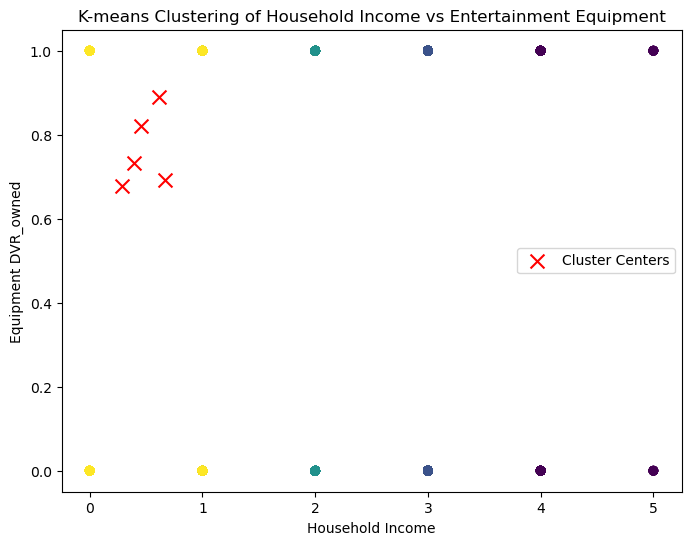

In [28]:
# Analyze clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling to interpret cluster centers

print("Cluster Centers:")
print(cluster_centers)

# Data distribution among clusters
print("Data Distribution in Clusters:")
print(income_equipment_data['Cluster'].value_counts())

# Visualize the clusters with 2 features
plt.figure(figsize=(8, 6))
plt.scatter(income_equipment_data['Income_Num'], income_equipment_data['DVR_owned'], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
plt.xlabel('Household Income')
plt.ylabel('Equipment DVR_owned')
plt.title('K-means Clustering of Household Income vs Entertainment Equipment')
plt.legend()
plt.show()

In [29]:
print(income_equipment_data.columns)


Index(['DVR_owned', 'FlatTV_owned', 'MediaBox_owned', 'Fob_owned', 'DVD_owned',
       'GamingCon_owned', 'PortableGame_owned', 'Router_owned',
       'Desktop_owned', 'Laptop_owned', 'LapTabHybrid_owned', 'Tab9in_owned',
       'Tab7_9in_owned', 'EbookReader_owned', 'Smartphone3_5in_owned',
       'LargeSmartphone_owned', 'BasicMobile_owned', 'Smartwatch_owned',
       'FitnessBand_owned', 'SmartGlasses_owned', '3DPrinter_owned',
       'None_owned', 'DontKnow_owned', 'Income_Num', 'Income_0', 'Income_1',
       'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Cluster'],
      dtype='object')


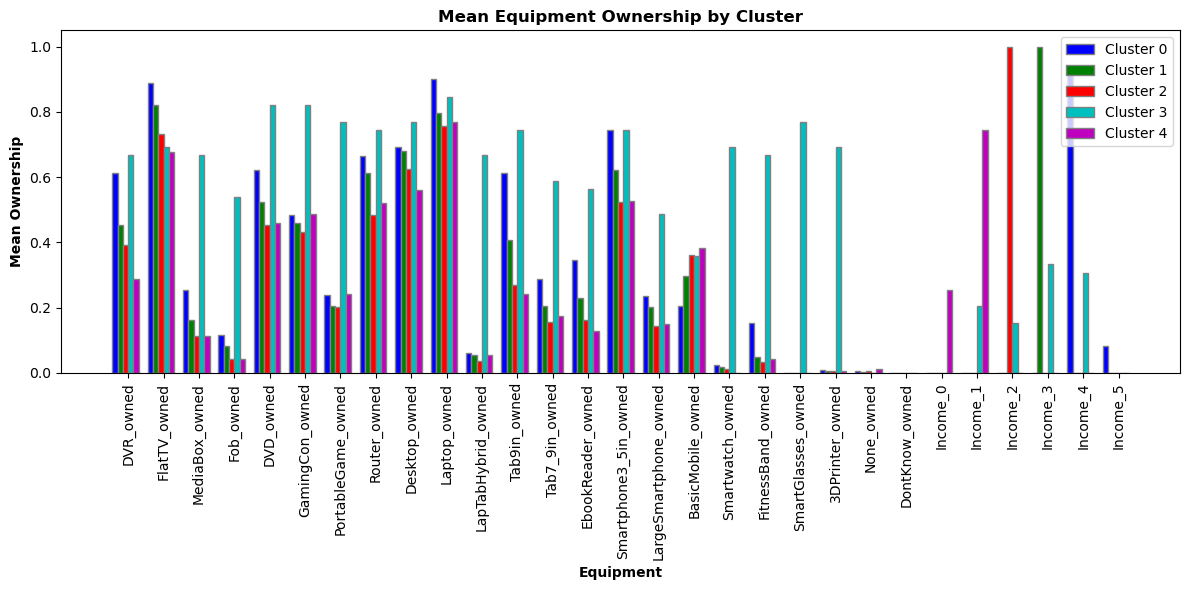

In [30]:
# A grouped bar chart showing the mean ownership of different equipment types across the clusters
# Mean ownership of equipment within each cluster
cluster_means = income_equipment_data.groupby('Cluster').mean().reset_index()


# Plotting - for some reason seaborn is failing 
equipment = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).columns
cluster_0_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[0].values
cluster_1_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[1].values
cluster_2_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[2].values
cluster_3_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[3].values
cluster_4_means = cluster_means.drop(['Cluster', 'Income_Num'], axis=1).iloc[4].values

num_clusters = len(cluster_means)


bar_width = 0.15

r1 = np.arange(len(equipment))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(12, 6))
plt.bar(r1, cluster_0_means, color='b', width=bar_width, edgecolor='grey', label='Cluster 0')
plt.bar(r2, cluster_1_means, color='g', width=bar_width, edgecolor='grey', label='Cluster 1')
plt.bar(r3, cluster_2_means, color='r', width=bar_width, edgecolor='grey', label='Cluster 2')
plt.bar(r4, cluster_3_means, color='c', width=bar_width, edgecolor='grey', label='Cluster 3')
plt.bar(r5, cluster_4_means, color='m', width=bar_width, edgecolor='grey', label='Cluster 4')

plt.xlabel('Equipment', fontweight='bold')
plt.ylabel('Mean Ownership', fontweight='bold')
plt.xticks([r + bar_width * (num_clusters / 2) for r in range(len(equipment))], equipment, rotation=90)
plt.title('Mean Equipment Ownership by Cluster', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
## Importance Dataset
important_equipments = ['PayTV','HomeInternet','LandlineTelephone','MobileVoice','MobileDataPlan','StreamingVideoService','StreamingMusicService','Gaming','News/Newspaper','Magazine']

In [54]:
df_mapped = df1[important_equipments]

In [ ]:
df_mapped = df_mapped.fillna(0)
df_mapped

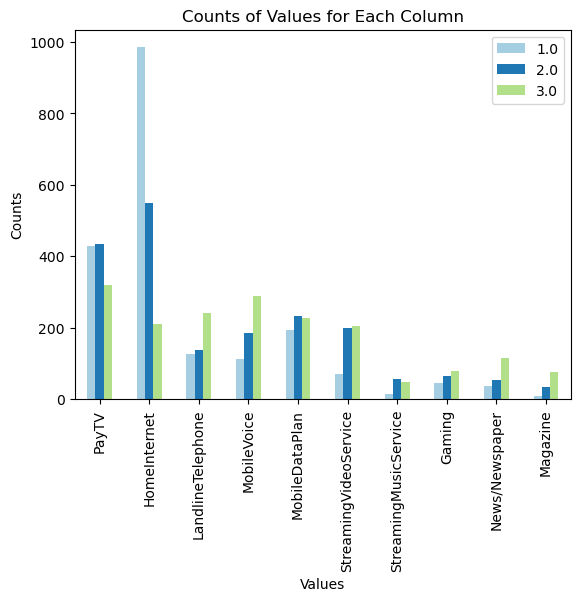

In [78]:
counts = df_mapped.apply(lambda x: x.value_counts())[1:].transpose()

# Plotting
colors = plt.cm.Paired(range(len(important_equipments)+1))

ax = counts.plot(kind='bar', stacked=False, color=colors)
ax.set_xlabel('Values')
ax.set_ylabel('Counts')
ax.set_title('Counts of Values for Each Column')

plt.show() 

## TV

In [134]:
## TV ownership prediction based on demographics 
## df1

In [86]:
df_sampled = df1[['Age', 'Gender', 'State', 'EmploymentStatus', 'FlatTV_owned']]

In [87]:
df_sampled

,Age,Gender,State,EmploymentStatus,FlatTV_owned
0,28,Female,California,Unemployed,No
1,33,Female,New York,Unemployed,Yes
2,24,Male,Nevada,Employed full-time or part-time,Yes
3,51,Female,New Jersey,Self-employed,Yes
4,20,Male,Arkansas,Unemployed,Yes
...,...,...,...,...,...
2071,73,Male,Florida,Retired,Yes
2072,27,Male,California,Employed full-time or part-time,Yes
2073,29,Male,Texas,Employed full-time or part-time,Yes
2074,25,Male,Vermont,Employed full-time or part-time,Yes


In [90]:
income = income_equipment_data[['Income_Num', 'Income_0','Income_1','Income_2','Income_3','Income_4','Income_5']]

In [91]:
merged_df = pd.merge(df_sampled, income, left_index=True, right_index=True)

In [94]:
merged_df

,Age,Gender,State,EmploymentStatus,FlatTV_owned,Income_Num,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5
0,28,Female,California,Unemployed,0,3,0,0,0,1,0,0
1,33,Female,New York,Unemployed,1,3,0,0,0,1,0,0
2,24,Male,Nevada,Employed full-time or part-time,1,3,0,0,0,1,0,0
3,51,Female,New Jersey,Self-employed,1,4,0,0,0,0,1,0
4,20,Male,Arkansas,Unemployed,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2071,73,Male,Florida,Retired,1,3,0,0,0,1,0,0
2072,27,Male,California,Employed full-time or part-time,1,2,0,0,1,0,0,0
2073,29,Male,Texas,Employed full-time or part-time,1,3,0,0,0,1,0,0
2074,25,Male,Vermont,Employed full-time or part-time,1,4,0,0,0,0,1,0


In [93]:
 merged_df['FlatTV_owned'] = merged_df['FlatTV_owned'].map({'Yes': 1, 'No': 0})

In [95]:
categorical_columns = ['Age', 'Gender', 'State', 'EmploymentStatus']

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded)

      FlatTV_owned  Income_Num  Income_0  Income_1  Income_2  Income_3  \
0                0           3         0         0         0         1   
1                1           3         0         0         0         1   
2                1           3         0         0         0         1   
3                1           4         0         0         0         0   
4                1           1         0         1         0         0   
...            ...         ...       ...       ...       ...       ...   
2071             1           3         0         0         0         1   
2072             1           2         0         0         1         0   
2073             1           3         0         0         0         1   
2074             1           4         0         0         0         0   
2075             0           3         0         0         0         1   

      Income_4  Income_5  Age_14  Age_15  ...  State_Virginia  \
0            0         0       0       0  ... 

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Define your predictors (X) and outcome variable (y)
X = df_encoded.drop(['FlatTV_owned'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['FlatTV_owned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7331730769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.04      0.07       104
           1       0.75      0.96      0.84       312

    accuracy                           0.73       416
   macro avg       0.51      0.50      0.46       416
weighted avg       0.63      0.73      0.65       416



In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1_encoded is your encoded DataFrame and 'TargetVariable' is your target variable
# Modify 'TargetVariable' with the actual name of your target variable
X = df_encoded.drop(['FlatTV_owned'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['FlatTV_owned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.6923
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.23      0.27       104
           1       0.77      0.85      0.80       312

    accuracy                           0.69       416
   macro avg       0.55      0.54      0.54       416
weighted avg       0.66      0.69      0.67       416



In [101]:
# Future purchase of TV prediction based on demographics 

In [102]:
df_sampled = df1[['Age', 'Gender', 'State', 'EmploymentStatus', 'FlatTV_Future']]

In [103]:
df_sampled

,Age,Gender,State,EmploymentStatus,FlatTV_Future
0,28,Female,California,Unemployed,No
1,33,Female,New York,Unemployed,No
2,24,Male,Nevada,Employed full-time or part-time,No
3,51,Female,New Jersey,Self-employed,No
4,20,Male,Arkansas,Unemployed,No
...,...,...,...,...,...
2071,73,Male,Florida,Retired,No
2072,27,Male,California,Employed full-time or part-time,No
2073,29,Male,Texas,Employed full-time or part-time,No
2074,25,Male,Vermont,Employed full-time or part-time,No


In [104]:
income = income_equipment_data[['Income_Num', 'Income_0','Income_1','Income_2','Income_3','Income_4','Income_5']]

In [105]:
merged_df = pd.merge(df_sampled, income, left_index=True, right_index=True)

In [106]:
merged_df

,Age,Gender,State,EmploymentStatus,FlatTV_Future,Income_Num,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5
0,28,Female,California,Unemployed,No,3,0,0,0,1,0,0
1,33,Female,New York,Unemployed,No,3,0,0,0,1,0,0
2,24,Male,Nevada,Employed full-time or part-time,No,3,0,0,0,1,0,0
3,51,Female,New Jersey,Self-employed,No,4,0,0,0,0,1,0
4,20,Male,Arkansas,Unemployed,No,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2071,73,Male,Florida,Retired,No,3,0,0,0,1,0,0
2072,27,Male,California,Employed full-time or part-time,No,2,0,0,1,0,0,0
2073,29,Male,Texas,Employed full-time or part-time,No,3,0,0,0,1,0,0
2074,25,Male,Vermont,Employed full-time or part-time,No,4,0,0,0,0,1,0


In [107]:
 merged_df['FlatTV_Future'] = merged_df['FlatTV_Future'].map({'Yes': 1, 'No': 0})

In [108]:
categorical_columns = ['Age', 'Gender', 'State', 'EmploymentStatus']

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded)

      FlatTV_Future  Income_Num  Income_0  Income_1  Income_2  Income_3  \
0                 0           3         0         0         0         1   
1                 0           3         0         0         0         1   
2                 0           3         0         0         0         1   
3                 0           4         0         0         0         0   
4                 0           1         0         1         0         0   
...             ...         ...       ...       ...       ...       ...   
2071              0           3         0         0         0         1   
2072              0           2         0         0         1         0   
2073              0           3         0         0         0         1   
2074              0           4         0         0         0         0   
2075              1           3         0         0         0         1   

      Income_4  Income_5  Age_14  Age_15  ...  State_Virginia  \
0            0         0       0  

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1_encoded is your encoded DataFrame and 'TargetVariable' is your target variable
# Modify 'TargetVariable' with the actual name of your target variable
X = df_encoded.drop(['FlatTV_Future'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['FlatTV_Future']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9327
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       399
           1       0.00      0.00      0.00        17

    accuracy                           0.93       416
   macro avg       0.48      0.49      0.48       416
weighted avg       0.92      0.93      0.93       416



In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Define your predictors (X) and outcome variable (y)
X = df_encoded.drop(['FlatTV_Future'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['FlatTV_Future']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9591346153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       399
           1       0.00      0.00      0.00        17

    accuracy                           0.96       416
   macro avg       0.48      0.50      0.49       416
weighted avg       0.92      0.96      0.94       416



/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/taliaqaiser/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Home Internet

Q26 - Which of the following subscriptions does your household purchase?-Pay TV (cable and/or satellite)	Q26 - Which of the following subscriptions does your household purchase?-Home internet	Q26 - Which of the following subscriptions does your household purchase?-Landline telephone	Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)	Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan	Q26 - Which of the following subscriptions does your household purchase?-Streaming video service	Q26 - Which of the following subscriptions does your household purchase?-Streaming music service	Q26 - Which of the following subscriptions does your household purchase?-Gaming	Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)	Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)	Q26 - Which of the following subscriptions does your household purchase?-None of the above	Q26 - Which of the following subscriptions does your household purchase?-Don't Know

In [111]:
encoded_columns_q26 = {
    "Q26 - Which of the following subscriptions does your household purchase?-Pay TV (cable and/or satellite)": "PayTV_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Home internet": "HomeInternet_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Landline telephone": "LandlineTelephone_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)": "MobileVoice_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan": "MobileDataPlan_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Streaming video service": "StreamingVideoService_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Streaming music service": "StreamingMusicService_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Gaming": "Gaming_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)": "News/Newspaper_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)": "Magazine_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-None of the above": "None_Subscription",
    "Q26 - Which of the following subscriptions does your household purchase?-Don't Know": "DontKnow_Subscription"
}

df1 = df1.rename(columns=encoded_columns_q26)


In [113]:
df1['PayTV_Subscription']

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
2071     No
2072    Yes
2073    Yes
2074    Yes
2075    Yes
Name: PayTV_Subscription, Length: 2076, dtype: object

In [119]:
subscription_columns = df1[['PayTV_Subscription',
    'HomeInternet_Subscription',
    'LandlineTelephone_Subscription',
    'MobileVoice_Subscription',
    'MobileDataPlan_Subscription',
    'StreamingVideoService_Subscription',
    'StreamingMusicService_Subscription',
    'Gaming_Subscription',
    'News/Newspaper_Subscription',
    'Magazine_Subscription',
    'None_Subscription',
    'DontKnow_Subscription']]

In [124]:
subscription_mapping = {'Yes': 1, 'No': 0}

for column in subscription_columns:
    df1[column] = df1[column].map(subscription_mapping)

In [126]:
df1['Gaming_Subscription']

0       0
1       0
2       1
3       0
4       0
       ..
2071    0
2072    0
2073    0
2074    0
2075    1
Name: Gaming_Subscription, Length: 2076, dtype: int64

In [127]:
# Whether a respondent subscribes to home internet

In [128]:
df_sampled = df1[['Age', 'Gender', 'State', 'EmploymentStatus', 'PayTV_Subscription',
    'HomeInternet_Subscription',
    'LandlineTelephone_Subscription',
    'MobileVoice_Subscription',
    'MobileDataPlan_Subscription',
    'StreamingVideoService_Subscription',
    'StreamingMusicService_Subscription',
    'Gaming_Subscription',
    'News/Newspaper_Subscription',
    'Magazine_Subscription',
    'None_Subscription',
    'DontKnow_Subscription']]

In [129]:
merged_df = pd.merge(df_sampled, income, left_index=True, right_index=True)

In [130]:
merged_df

,Age,Gender,State,EmploymentStatus,PayTV_Subscription,HomeInternet_Subscription,LandlineTelephone_Subscription,MobileVoice_Subscription,MobileDataPlan_Subscription,StreamingVideoService_Subscription,...,Magazine_Subscription,None_Subscription,DontKnow_Subscription,Income_Num,Income_0,Income_1,Income_2,Income_3,Income_4,Income_5
0,28,Female,California,Unemployed,0,1,0,0,1,1,...,0,0,0,3,0,0,0,1,0,0
1,33,Female,New York,Unemployed,0,0,0,0,0,0,...,0,1,0,3,0,0,0,1,0,0
2,24,Male,Nevada,Employed full-time or part-time,1,1,0,1,1,1,...,0,0,0,3,0,0,0,1,0,0
3,51,Female,New Jersey,Self-employed,1,1,1,1,1,1,...,0,0,0,4,0,0,0,0,1,0
4,20,Male,Arkansas,Unemployed,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,73,Male,Florida,Retired,0,1,1,1,0,0,...,0,0,0,3,0,0,0,1,0,0
2072,27,Male,California,Employed full-time or part-time,1,1,1,0,1,1,...,0,0,0,2,0,0,1,0,0,0
2073,29,Male,Texas,Employed full-time or part-time,1,1,0,1,1,1,...,0,0,0,3,0,0,0,1,0,0
2074,25,Male,Vermont,Employed full-time or part-time,1,1,1,1,1,0,...,1,0,0,4,0,0,0,0,1,0


In [131]:
categorical_columns = ['Age', 'Gender', 'State', 'EmploymentStatus']

# Apply one-hot encoding to the selected categorical columns
df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded)

      PayTV_Subscription  HomeInternet_Subscription  \
0                      0                          1   
1                      0                          0   
2                      1                          1   
3                      1                          1   
4                      0                          1   
...                  ...                        ...   
2071                   0                          1   
2072                   1                          1   
2073                   1                          1   
2074                   1                          1   
2075                   1                          0   

      LandlineTelephone_Subscription  MobileVoice_Subscription  \
0                                  0                         0   
1                                  0                         0   
2                                  0                         1   
3                                  1                         1   
4        

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1_encoded is your encoded DataFrame and 'TargetVariable' is your target variable
# Modify 'TargetVariable' with the actual name of your target variable
X = df_encoded.drop(['HomeInternet_Subscription'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['HomeInternet_Subscription']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8582
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.34      0.32        41
           1       0.93      0.91      0.92       375

    accuracy                           0.86       416
   macro avg       0.62      0.63      0.62       416
weighted avg       0.87      0.86      0.86       416



In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Define your predictors (X) and outcome variable (y)
X = df_encoded.drop(['HomeInternet_Subscription'], axis=1)  # axis=1 means you are dropping a column
y = df_encoded['HomeInternet_Subscription']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9110576923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.27      0.37        41
           1       0.92      0.98      0.95       375

    accuracy                           0.91       416
   macro avg       0.77      0.62      0.66       416
weighted avg       0.89      0.91      0.90       416

